# Precipitation global map

This notebook calculates the unweighted precip averaged over all time (100 years) and all ensemble members for each grid point, for each precision. 




In [ ]:
import glob
import xarray as xr
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
import sys

def get_global_weights():
    
     #Get the latitude weights from a special location
    r1 = '/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/speedyone/paper/Fig1_10year_Williams/'
    f = r1 + 'speedyoneWILLIAMS_L2_52_RN_10y/model_output00001.nc'
    df = xr.open_dataset(f)
    
    temperature = df.temperature    
    return temperature.latitude


    
def process_nc_file(f,true_latitude,counter):    
    
    #Get data 
    ds = xr.open_dataset(f)
    
        
    #Reset the latitude
    ds = ds.assign_coords(latitude=(true_latitude))
    
    #And covert longitude to long1
    ds = ds.assign_coords({"longitude": (((ds.longitude + 180) % 360) - 180)})
    
  
    #Just get the precip
    LSP = ds.large_scale_precipitation * (6*60*60) / 1000 #mm / 6h
    CVP = ds.convective_precipitation  * (6*60*60) / 1000 #mm / 6h              
    precip = LSP + CVP
    
    if LSP.shape == (365, 48, 96):
        use = True
    else:
        use = False
    
    
    
    df = precip.to_dataframe(name='precipitation').reset_index()
    
    df['weight']= np.cos(np.deg2rad(df.latitude))
    df['weighted_precipitation']=  df.weight*df.precipitation
    
    
    df = df.groupby(['latitude', 'longitude']).mean().reset_index() #i.e. average over 1 year

  
    return df,use
    
    
    
def global_average(list_of_files,fname):
    
    """
    Average over all ensemble members (m0,m1 etc) and all times
    """

    
    print ('Processing:')
    true_latitude = get_global_weights()
    counter = 0
    dfs = []
    for f in tqdm(list_of_files):
        df,use = process_nc_file(f,true_latitude,counter) #this is a df of the surface temperature for that file, averaged over time
        if use: #only ue files if they are 'complete' i.e. are not single time snapshots
            counter += 1
            dfs.append(df)
  
    df = pd.concat(dfs)
    
    #group it
    df_g = df.groupby(['latitude', 'longitude']).mean().reset_index() #i.e. average over all time and ensemble members

    
    #save it
    pd.to_pickle(df_g,fname)
    
    return df_g
    
    
control_files = '/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/speedyone/paper/100year/tmp_control/*/model_output*.nc'
competitor_52RN_files = '/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/speedyone/paper/100year/tmp_m*/speedyone100yr_L2_52_RN_*/model_output*.nc'
competitor_10SR_files = '/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/speedyone/paper/100year/tmp_m*/speedyone100yr_L2_10_SR_*/**/model_output*.nc'

#Handle these differently
competitor_10RN_files_1 = '/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/speedyone/paper/100year/tmp_m*/speedyone100yr_L2_10_RN_*/model_output*.nc'
competitor_10RN_files_2 = '/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/speedyone/paper/100year/tmp_m*/speedyone100yr_L2_10_RN_*/**/model_output*.nc'




#Get the average over all time and all ensemble members
df_control = global_average(sorted(glob.glob(control_files)),                          'small_data/control_map_precip_weighted.pkl')
df_52      = global_average(sorted(glob.glob(competitor_52RN_files)),                  'small_data/52_map_precip_weighted.pkl')
df_SR      = global_average(sorted(glob.glob(competitor_10SR_files)),                  'small_data/SR_map_precip_weighted.pkl')
df_10      = global_average(sorted(glob.glob(competitor_10RN_files_1)+glob.glob(competitor_10RN_files_2)) ,'small_data/10_map_precip_weighted.pkl')





Processing:


  0%|          | 0/503 [00:00<?, ?it/s]

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/k/kimpson/bin/conda/envs/workhorse/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3457, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_53445/762145844.py", line 99, in <module>
    df_control = global_average(sorted(glob.glob(control_files)),                          'small_data/control_map_precip_weighted.pkl')
  File "/tmp/ipykernel_53445/762145844.py", line 70, in global_average
    df,use = process_nc_file(f,true_latitude,counter) #this is a df of the surface temperature for that file, averaged over time
  File "/tmp/ipykernel_53445/762145844.py", line 23, in process_nc_file
    ds = xr.open_dataset(f)
  File "/home/k/kimpson/bin/conda/envs/workhorse/lib/python3.7/site-packages/xarray/backends/api.py", line 479, in open_dataset
    engine = plugins.guess_engine(filename_or_obj)
  File "/home/k/kimpson/bin/conda/envs/workhorse/lib/python3.7/site-packages/xarray/backends/pl

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/k/kimpson/bin/conda/envs/workhorse/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3457, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_53445/762145844.py", line 99, in <module>
    df_control = global_average(sorted(glob.glob(control_files)),                          'small_data/control_map_precip_weighted.pkl')
  File "/tmp/ipykernel_53445/762145844.py", line 70, in global_average
    df,use = process_nc_file(f,true_latitude,counter) #this is a df of the surface temperature for that file, averaged over time
  File "/tmp/ipykernel_53445/762145844.py", line 23, in process_nc_file
    ds = xr.open_dataset(f)
  File "/home/k/kimpson/bin/conda/envs/workhorse/lib/python3.7/site-packages/xarray/backends/api.py", line 479, in open_dataset
    engine = plugins.guess_engine(filename_or_obj)
  File "/home/k/kimpson/bin/conda/envs/workhorse/lib/python3.7/site-packages/xarray/backends/pl

---

## Plots

In [40]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point

def RobinsonPlotDev(df,cmap,lower_limit, upper_limit,nlevs,savefig,show_cbar):
    
    
    
    dftmp = df[['latitude','longitude','precipitation']].copy() #Make a copy
    dfpivot = dftmp.pivot('longitude', 'latitude') #Pivot onto lon/lat

    #Extract data into arrays
    lat=dfpivot.columns.levels[1].values
    lon=dfpivot.index.values
    data=dfpivot.values.T


    #Setup plotting env
    fig = plt.figure(figsize=[24,12])
    ax = plt.subplot(projection=ccrs.Robinson(central_longitude=0))
    
    
    if (lower_limit is None) & (upper_limit is None):
        levels = nlevs
    else:
        levels = np.linspace(lower_limit,upper_limit,nlevs)
    

    data, lon = add_cyclic_point(data, coord=lon) #https://stackoverflow.com/questions/56348136/white-line-in-contour-plot-in-cartopy-on-center-longitude
    contourf_ = ax.contourf(lon, lat, data,levels=levels,transform=ccrs.PlateCarree(central_longitude=0),cmap=cmap) #this has to be PlateCarree https://stackoverflow.com/questions/56761472/lack-of-projection-for-cartopy-contour
    
    print ('Limits:', min(data.flatten()), max(data.flatten()))
    print ('Mean:', )
    
    if show_cbar:
        cb = fig.colorbar(contourf_,orientation="horizontal",ax=ax,fraction=0.046, pad=0.04,ticks=[-1, 0, 1])
        cb.ax.tick_params(labelsize=16)
        cb.set_label('mm / 6h',fontsize=16)

    #tick_params(labelsize=font_size)
    ax.coastlines()
    if savefig is not None:
        plt.savefig(savefig,bbox_inches='tight', pad_inches=0, dpi=300)
    
    plt.show()
    
      
    

In [4]:
dfcontrol = pd.read_pickle('control_map_precip.pkl')
df52 = pd.read_pickle('small_data/52_map_precip.pkl')
dfSR = pd.read_pickle('small_data/SR_map_precip.pkl')
df10 = pd.read_pickle('small_data/10_map_precip.pkl')

In [5]:
df10

,latitude,longitude,precipitation
0,-87.159095,-180.00,0.294525
1,-87.159095,-176.25,0.307790
2,-87.159095,-172.50,0.319460
3,-87.159095,-168.75,0.329646
4,-87.159095,-165.00,0.338088
...,...,...,...
4603,87.159095,161.25,0.285456
4604,87.159095,165.00,0.271683
4605,87.159095,168.75,0.257638
4606,87.159095,172.50,0.243258


Limits: 0.00024307425941284412 5.993434744182006


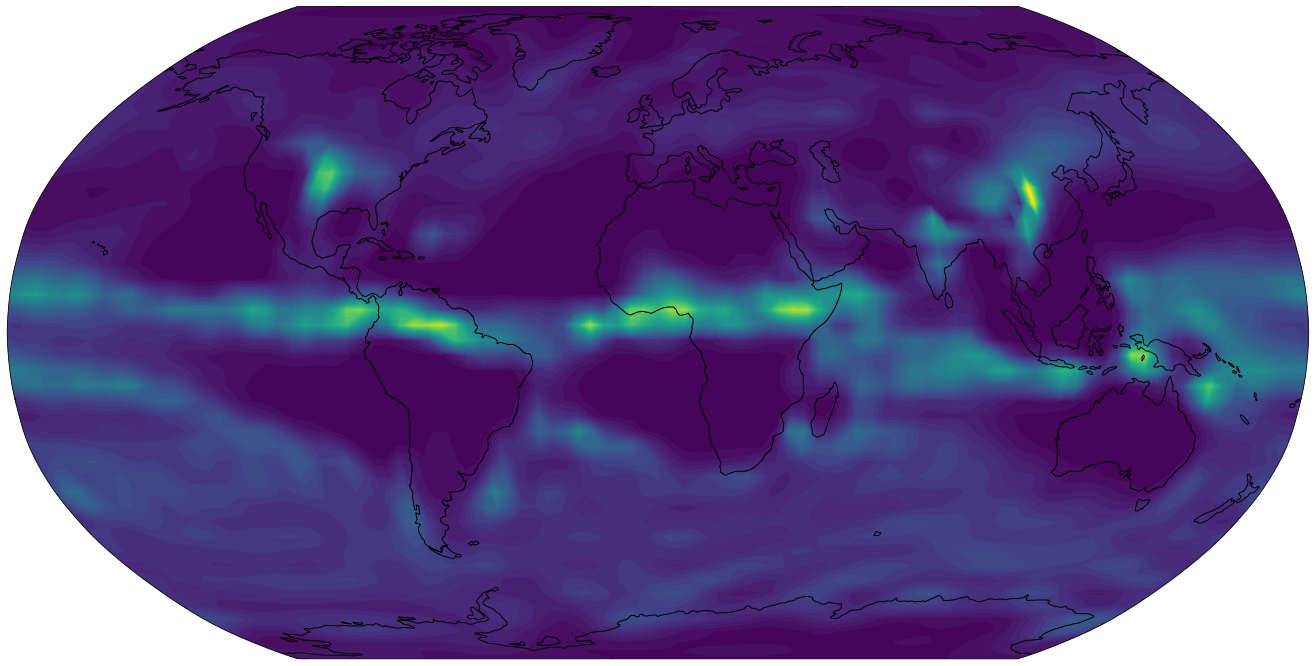

Limits: 0.00032170296202265787 6.0152300237465415


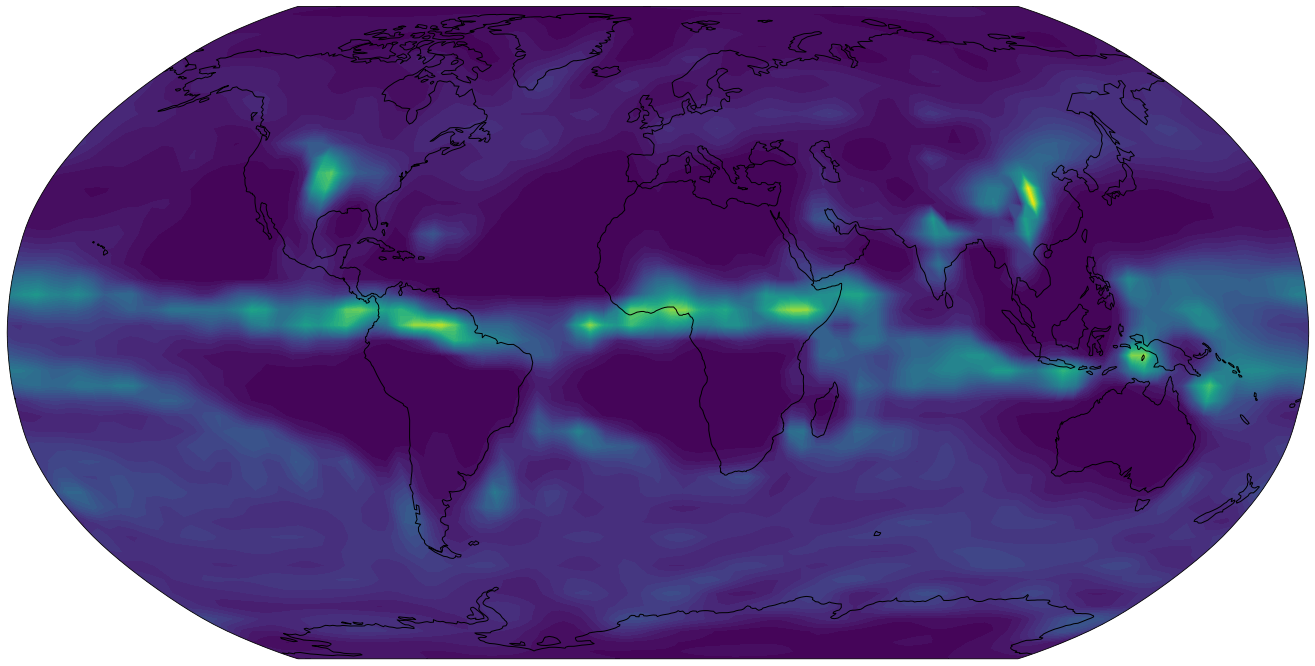

Limits: 0.00022279104435280579 5.9876175672206156


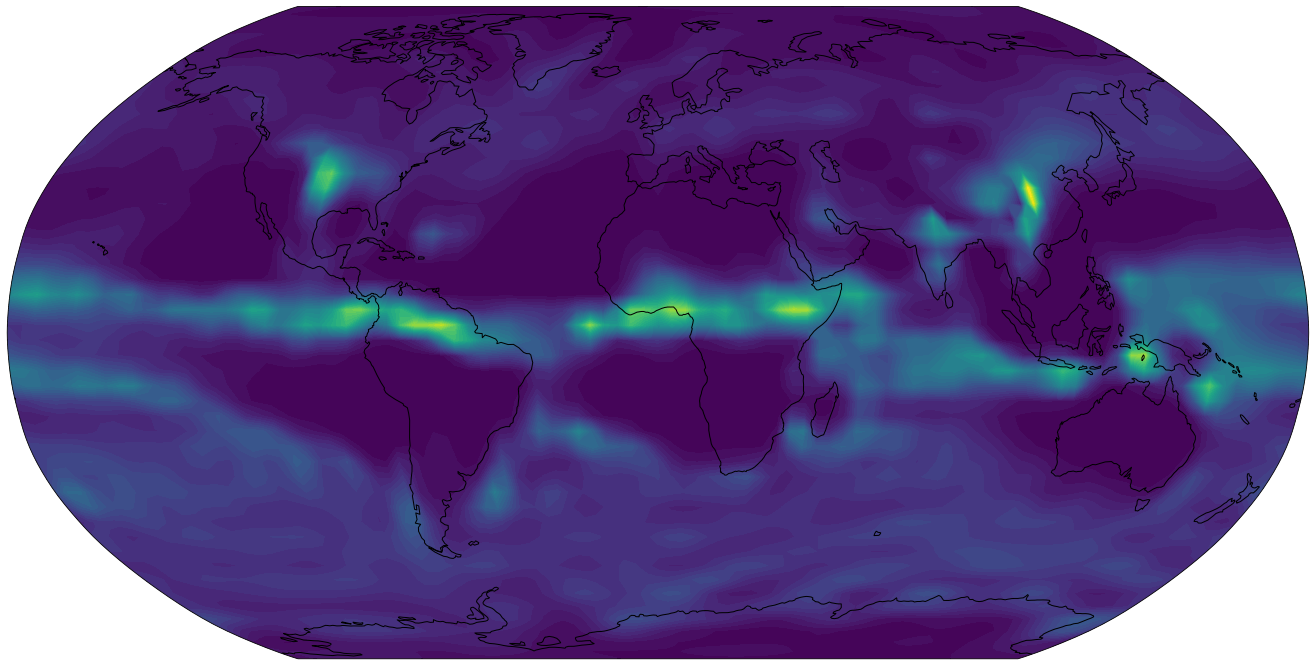

Limits: 0.00021243256771401184 5.88291713623264


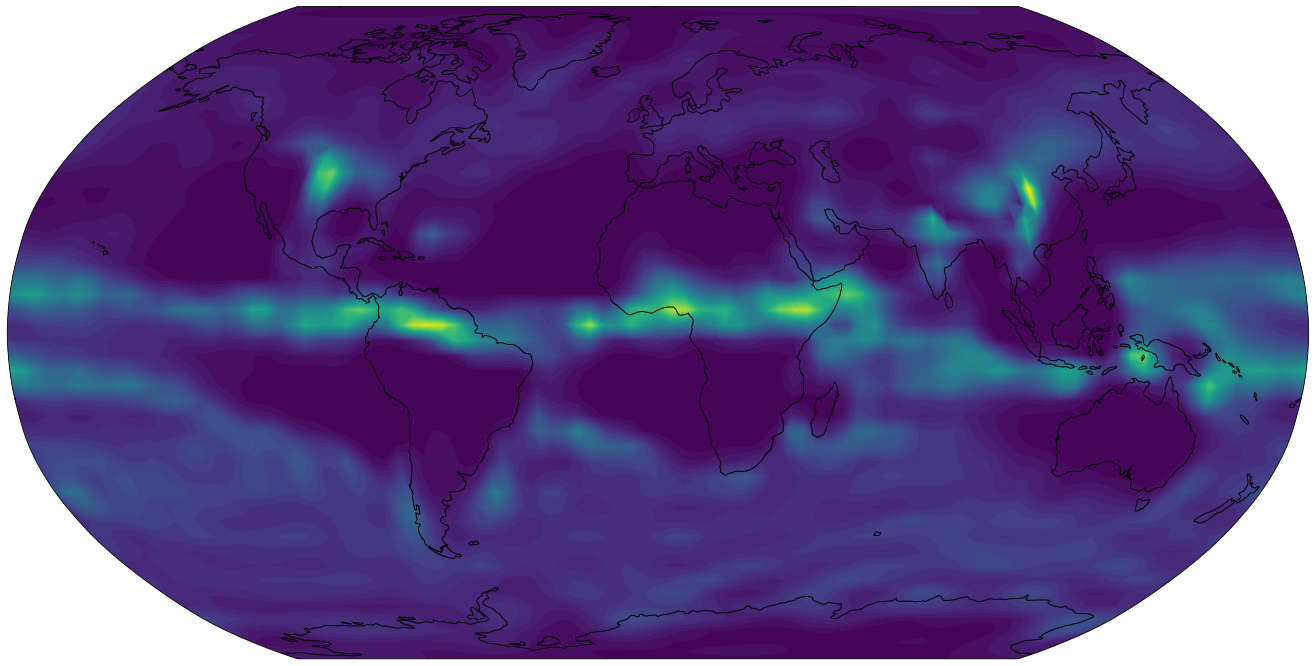

In [35]:


RobinsonPlotDev(dfcontrol,plt.cm.viridis, lower_limit=None, upper_limit=None, nlevs = 50,savefig=None,show_cbar=False)
RobinsonPlotDev(df52,plt.cm.viridis, lower_limit=None, upper_limit=None, nlevs = 50,savefig=None,show_cbar=False)
RobinsonPlotDev(dfSR,plt.cm.viridis, lower_limit=None, upper_limit=None, nlevs = 50,savefig=None,show_cbar=False)
RobinsonPlotDev(df10,plt.cm.viridis, lower_limit=None, upper_limit=None, nlevs = 50,savefig=None,show_cbar=False)


---

## Plot differences

In [36]:

#Subtract one from other
subs52 = dfcontrol.copy()
subs52['precipitation'] = dfcontrol.precipitation - df52.precipitation

subsSR = dfcontrol.copy()
subsSR['precipitation'] = dfcontrol.precipitation - dfSR.precipitation

subs10 = dfcontrol.copy()
subs10['precipitation'] = dfcontrol.precipitation - df10.precipitation


Limits: -0.07414448750081437 0.0605683696598045


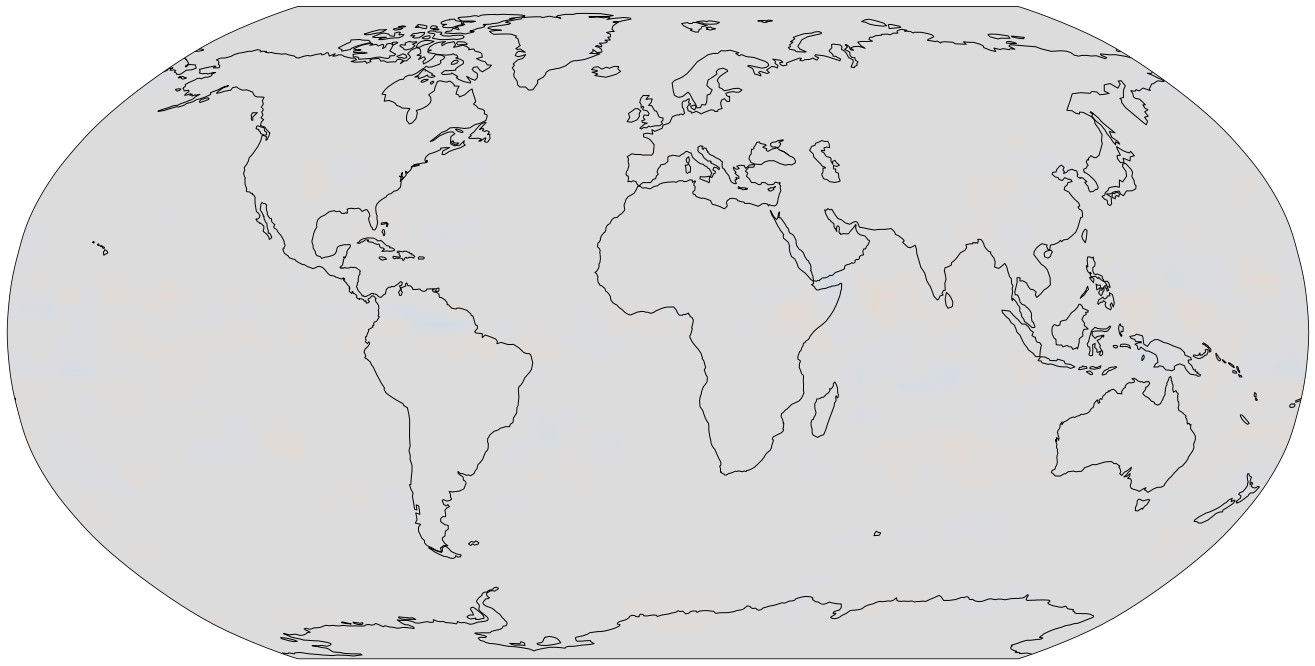

Limits: -0.16676669323465676 0.2094684785700376


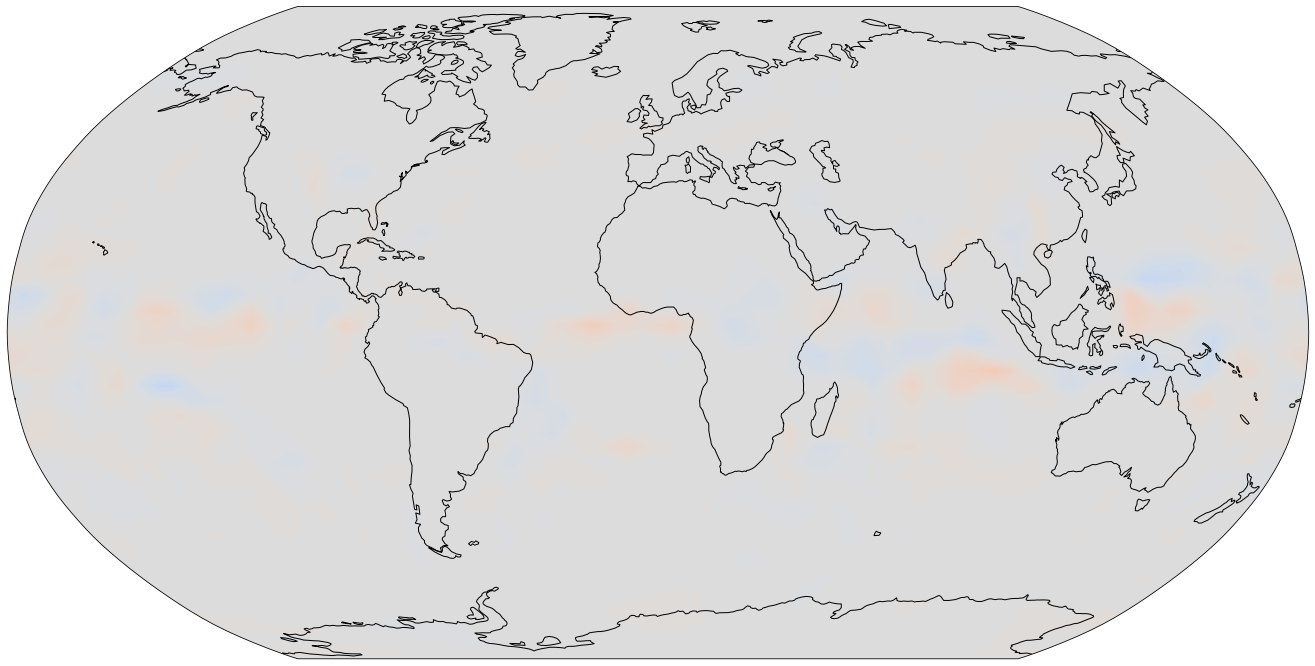

Limits: -1.0819066881709625 0.8429013458340138


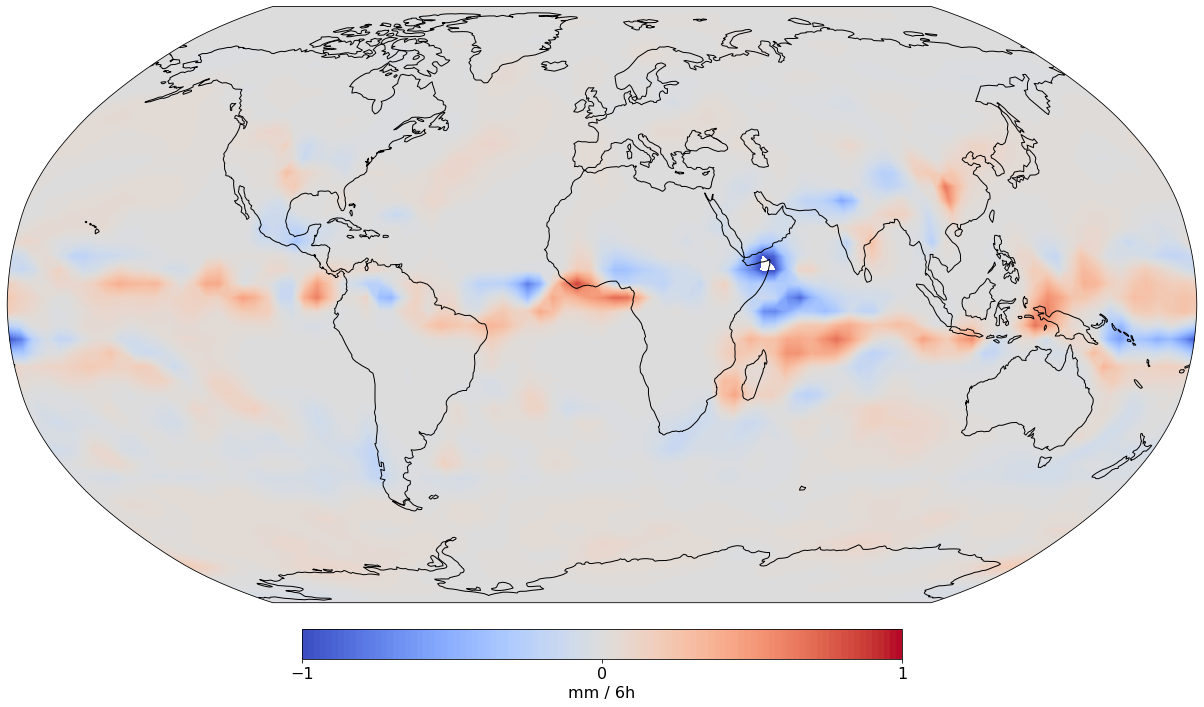

In [42]:
RobinsonPlotDev(subs52,plt.cm.coolwarm, lower_limit=-1, upper_limit=1, nlevs = 100,savefig='figs/MolMap52_precip.png',show_cbar=False)
RobinsonPlotDev(subsSR,plt.cm.coolwarm, lower_limit=-1, upper_limit=1, nlevs = 100,savefig='figs/MolMapSR_precip.png',show_cbar=False)
RobinsonPlotDev(subs10,plt.cm.coolwarm, lower_limit=-1, upper_limit=1, nlevs = 100,savefig='figs/MolMap10_precip.png',show_cbar=True)